In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [ ]:
df = pd.read_csv('/content/Pollutants_Data.csv',parse_dates=['Date'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         714 non-null    datetime64[ns]
 1   PM10(ug/m3)  714 non-null    object        
 2   NO2(ug/m3)   714 non-null    object        
 3   SO2(ug/m3)   714 non-null    object        
 4   CO(ug/m3)    714 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 28.0+ KB


In [ ]:
df=df.replace('None',np.nan)

In [ ]:
df = df.astype({"PM10(ug/m3)":"float","NO2(ug/m3)":"float","SO2(ug/m3)":"float","CO(ug/m3)":"float"})

In [ ]:
df.head()

,Date,PM10(ug/m3),NO2(ug/m3),SO2(ug/m3),CO(ug/m3)
0,2021-01-01,367.26,59.23,52.73,1.62
1,2021-01-02,439.88,54.40,33.87,2.13
2,2021-01-03,354.19,52.44,57.60,0.97
3,2021-01-04,425.98,42.30,30.84,1.36
4,2021-01-05,366.54,40.08,25.01,1.10


In [ ]:
df['PM10(ug/m3)'].value_counts()

61.35     2
72.23     2
25.86     2
37.46     2
58.57     2
         ..
125.44    1
96.43     1
90.74     1
58.16     1
194.85    1
Name: PM10(ug/m3), Length: 668, dtype: int64

In [ ]:
df.isna().sum()

Date            0
PM10(ug/m3)    41
NO2(ug/m3)      2
SO2(ug/m3)      3
CO(ug/m3)       7
dtype: int64

In [ ]:
df=df.fillna(df.mean())



<ipython-input-8-16365fc733ee>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df=df.fillna(df.mean())


In [ ]:
df.isna().sum()

Date           0
PM10(ug/m3)    0
NO2(ug/m3)     0
SO2(ug/m3)     0
CO(ug/m3)      0
dtype: int64

In [ ]:
df.head()

,Date,PM10(ug/m3),NO2(ug/m3),SO2(ug/m3),CO(ug/m3)
0,2021-01-01,367.26,59.23,52.73,1.62
1,2021-01-02,439.88,54.40,33.87,2.13
2,2021-01-03,354.19,52.44,57.60,0.97
3,2021-01-04,425.98,42.30,30.84,1.36
4,2021-01-05,366.54,40.08,25.01,1.10


In [ ]:
df1=df

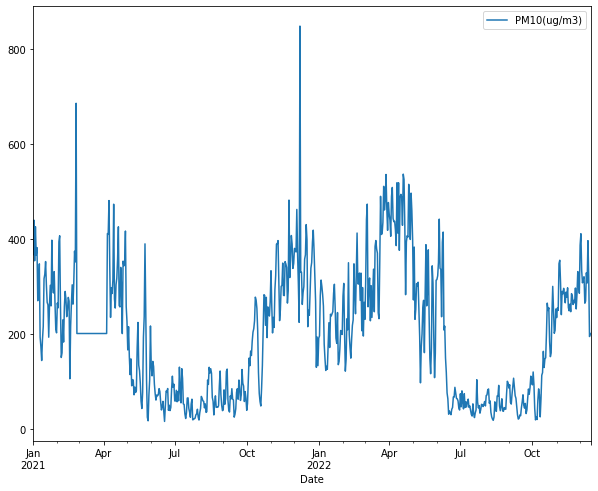

In [ ]:
df.plot(x='Date',y='PM10(ug/m3)',figsize=(10,8))

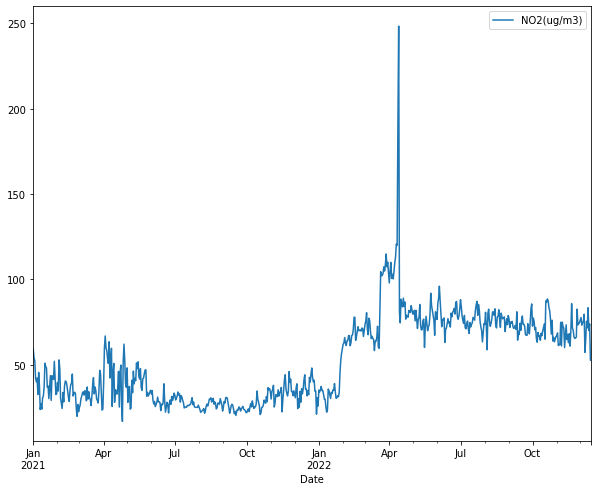

In [ ]:
df.plot(x='Date',y='NO2(ug/m3)',figsize=(10,8))

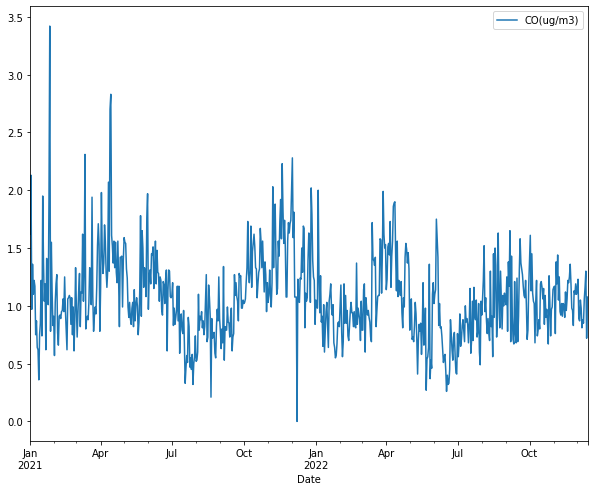

In [ ]:
df.plot(x='Date',y='CO(ug/m3)',figsize=(10,8))

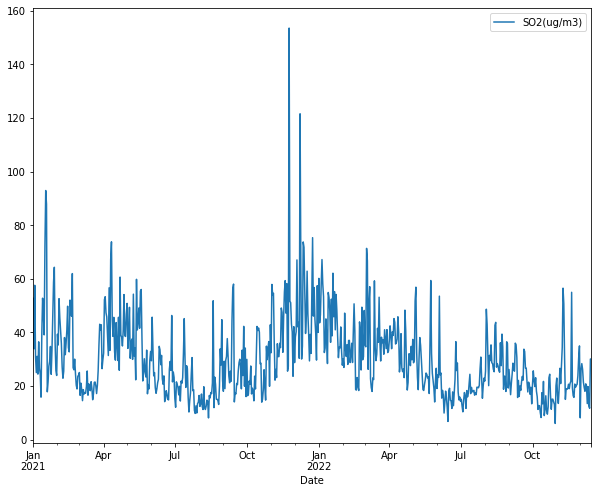

In [ ]:
df.plot(x='Date',y='SO2(ug/m3)',figsize=(10,8))

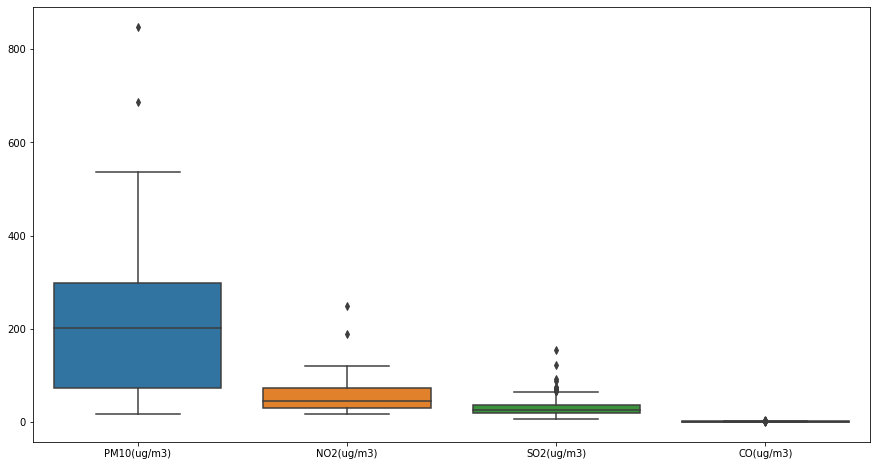

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.boxplot(data=df)

In [ ]:
df=df.set_index('Date')

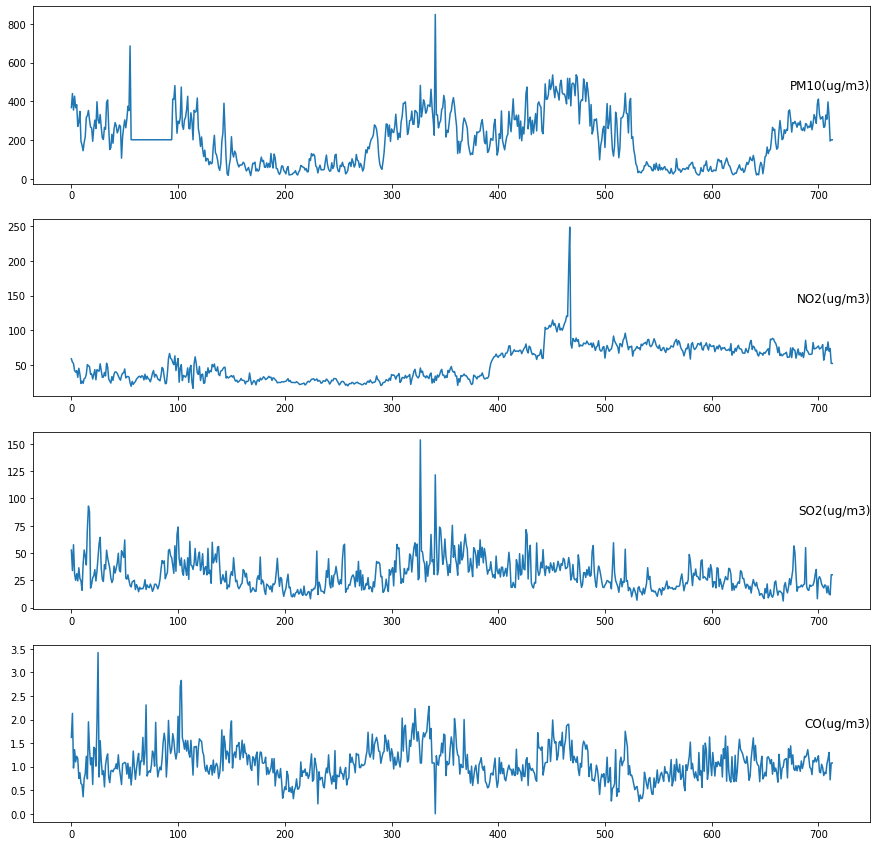

In [ ]:
from matplotlib import pyplot
# load dataset
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure(figsize=(15,15))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

print("Result of Dickey Fuller Test")

dftest = adfuller(df['PM10(ug/m3)'], autolag = 'AIC') # AIC is a metric

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#lags used', 'No. of observation used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Result of Dickey Fuller Test
Test Statistic              -2.534961
p-value                      0.107198
#lags used                   8.000000
No. of observation used    705.000000
Critical Value (1%)         -3.439660
Critical Value (5%)         -2.865648
Critical Value (10%)        -2.568958
dtype: float64


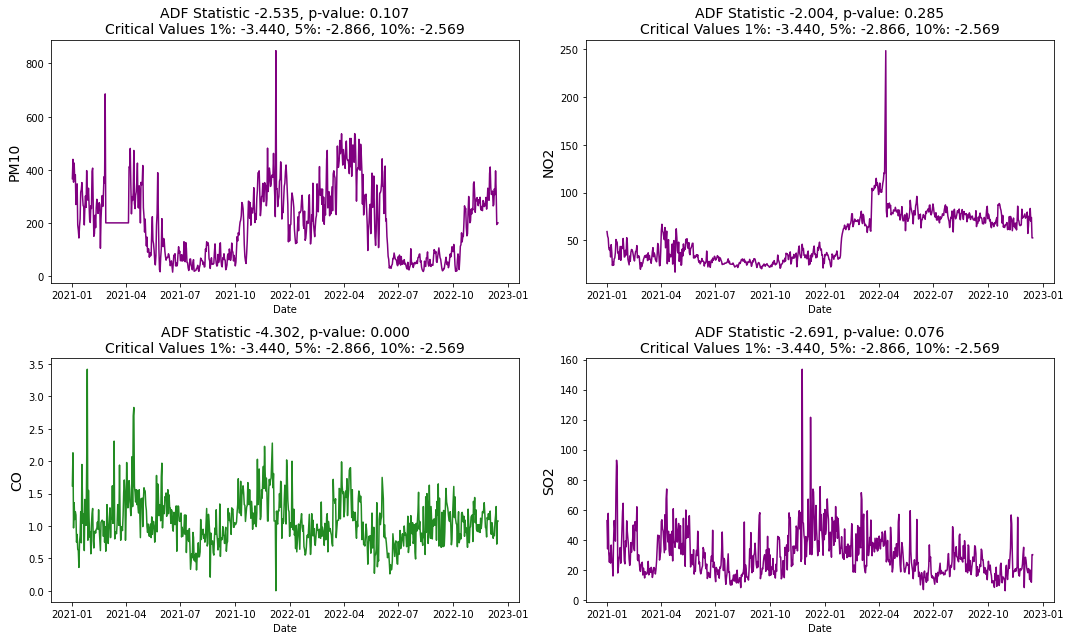

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df1['Date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df['PM10(ug/m3)'].values, 'PM10', ax[0, 0])
visualize_adfuller_results(df['CO(ug/m3)'].values, 'CO', ax[1, 0])
visualize_adfuller_results(df['NO2(ug/m3)'].values, 'NO2', ax[0, 1])
visualize_adfuller_results(df['SO2(ug/m3)'].values, 'SO2', ax[1, 1])

plt.tight_layout()
plt.show()

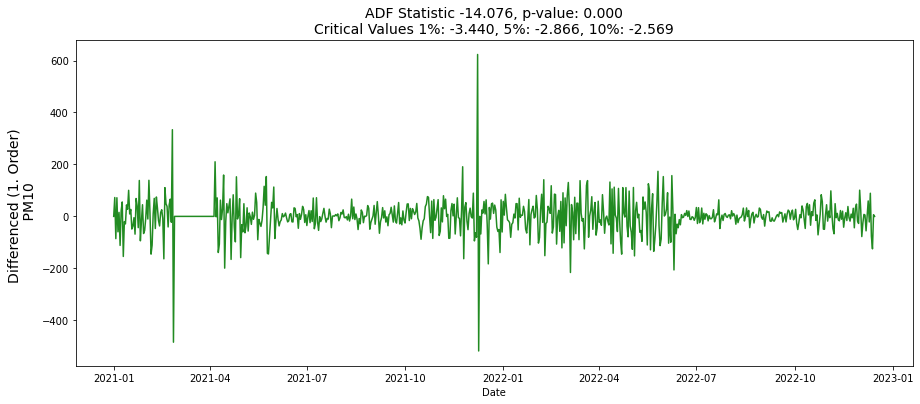

In [ ]:
# First Order Differencing
ts_diff = np.diff(df1['PM10(ug/m3)'])
df1['PM10(ug/m3)_diff_1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df1['PM10(ug/m3)_diff_1'], 'Differenced (1. Order) \n PM10', ax)

In [ ]:
df1.columns

Index(['Date', 'PM10(ug/m3)', 'NO2(ug/m3)', 'SO2(ug/m3)', 'CO(ug/m3)',
       'PM10(ug/m3)_diff_1'],
      dtype='object')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'PM10(ug/m3)', 'NO2(ug/m3)', 'SO2(ug/m3)', 'CO(ug/m3)'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

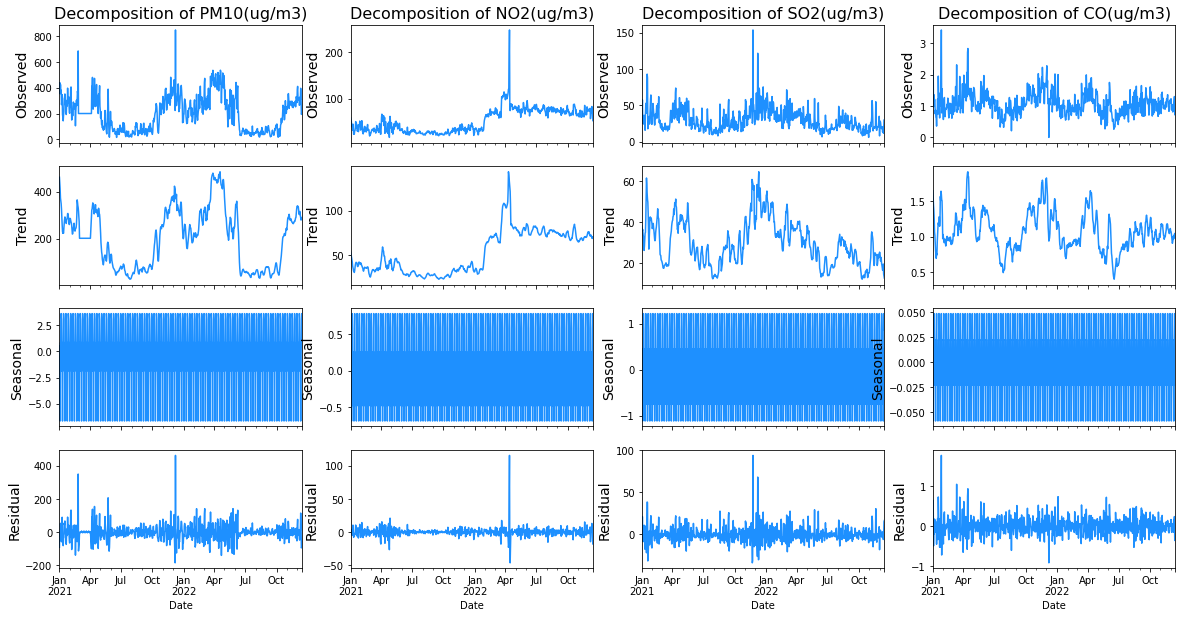

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, sharex=True, figsize=(20,10))

for i, column in enumerate(['PM10(ug/m3)', 'NO2(ug/m3)', 'SO2(ug/m3)', 'CO(ug/m3)']):
    
    res = seasonal_decompose(df[column], model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()


In [ ]:
df.head()

,PM10(ug/m3),NO2(ug/m3),SO2(ug/m3),CO(ug/m3),PM10(ug/m3)_1,PM10(ug/m3)_diff_1,PM10(ug/m3)_trend,PM10(ug/m3)_seasonal,NO2(ug/m3)_trend,NO2(ug/m3)_seasonal,SO2(ug/m3)_trend,SO2(ug/m3)_seasonal,CO(ug/m3)_trend,CO(ug/m3)_seasonal
Date,,,,,,,,,,,,,,
2021-01-01,367.26,59.23,52.73,1.62,0.00,0.00,460.760918,-1.874289,54.063265,-0.306798,38.425204,-0.750593,1.645714,-0.008264
2021-01-02,439.88,54.40,33.87,2.13,72.62,72.62,435.980357,0.527257,51.489490,-0.136453,37.221990,-0.193686,1.541429,-0.058867
2021-01-03,354.19,52.44,57.60,0.97,-85.69,-85.69,411.199796,-6.665714,48.915714,0.251994,36.018776,0.456303,1.437143,0.022418
2021-01-04,425.98,42.30,30.84,1.36,71.79,71.79,372.275714,0.851686,46.200000,-0.684105,36.512857,-1.116805,1.367143,0.022157
2021-01-05,366.54,40.08,25.01,1.10,-59.44,-59.44,361.548571,0.449114,44.248571,0.573399,34.192857,-0.477386,1.242857,0.048716


In [ ]:
df1.head()

,Date,PM10(ug/m3),NO2(ug/m3),SO2(ug/m3),CO(ug/m3),PM10(ug/m3)_diff_1
0,2021-01-01,367.26,59.23,52.73,1.62,0.00
1,2021-01-02,439.88,54.40,33.87,2.13,72.62
2,2021-01-03,354.19,52.44,57.60,0.97,-85.69
3,2021-01-04,425.98,42.30,30.84,1.36,71.79
4,2021-01-05,366.54,40.08,25.01,1.10,-59.44


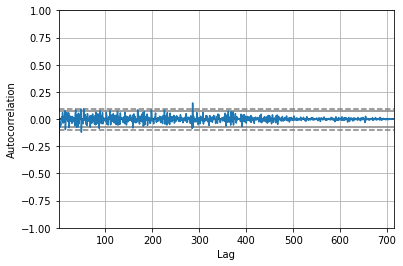

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['PM10(ug/m3)_diff_1'])
plt.show()

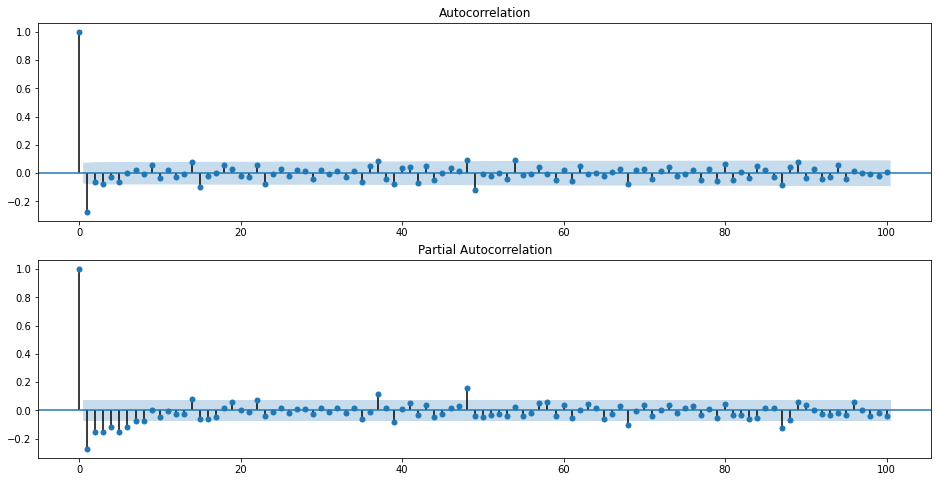

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['PM10(ug/m3)_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['PM10(ug/m3)_diff_1'], lags=100, ax=ax[1])

plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['(ug/m3)_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['PM10(ug/m3)_diff_1'], lags=100, ax=ax[1])

plt.show()

In [ ]:
train_size = int(0.85 * len(df1))
test_size = len(df1) - train_size

univariate_df = df1[['Date', 'PM10(ug/m3)']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

606 108


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6751684 sha256=6aaf804a4a72ba45310994d6fd6ab675ce35c0d80d2e4c5217818b272f632fbb
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from fbprophet import Prophet

# Train the model
model = Prophet(daily_seasonality=True)
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))
print( 'RMSE: {}'.format(score_rmse))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


RMSE: 385.3807801219989


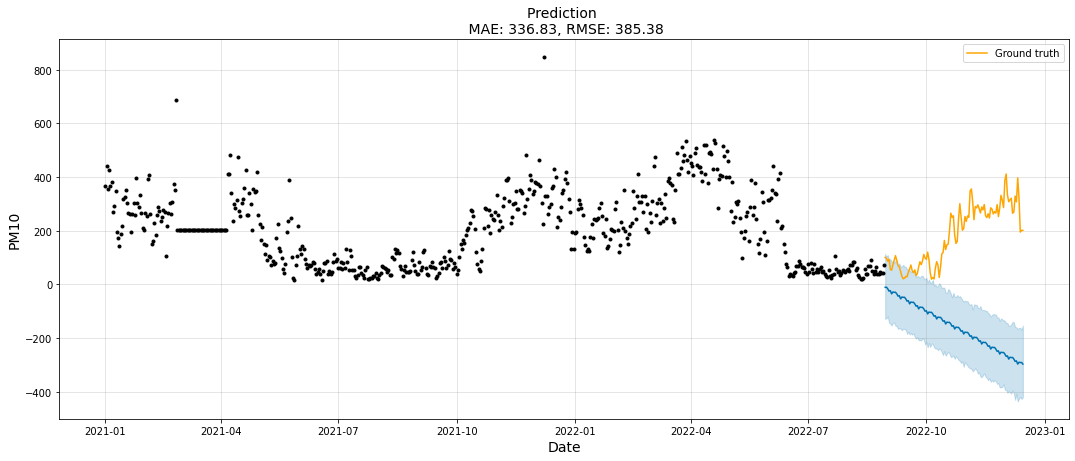

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='PM10', fontsize=14)

plt.show()

In [ ]:
y_valid

,y
606,100.700000
607,97.230000
608,86.380000
609,93.410000
610,55.930000
...,...
709,396.560000
710,319.750000
711,194.850000
712,201.205111


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Fit model
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(108)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 198.7483715136273


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
x_valid

,ds
606,2022-08-30
607,2022-08-31
608,2022-09-01
609,2022-09-02
610,2022-09-03
...,...
709,2022-12-11
710,2022-12-12
711,2022-12-13
712,2022-12-14


In [ ]:
y_valid

,y
606,100.700000
607,97.230000
608,86.380000
609,93.410000
610,55.930000
...,...
709,396.560000
710,319.750000
711,194.850000
712,201.205111


In [ ]:
x_valid.index

RangeIndex(start=606, stop=714, step=1)

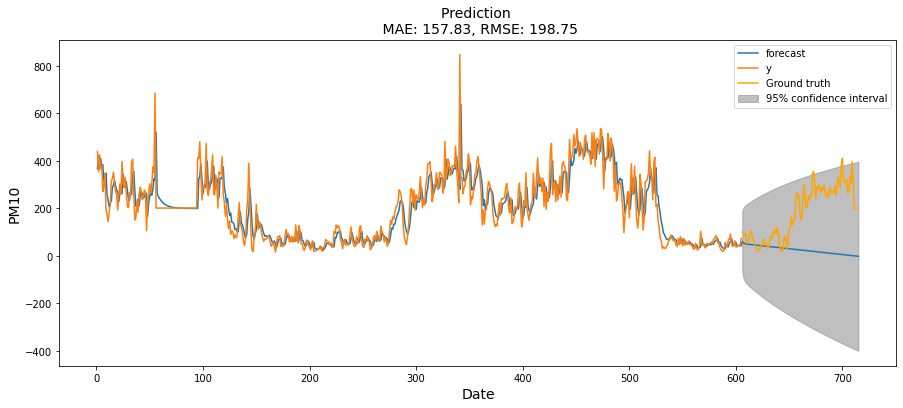

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model_fit.plot_predict(1,715, ax=ax)
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='PM10', fontsize=14)

#ax.set_ylim(-35, -18)
plt.show()